In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Transfering data to GPU memory will take time and we only do it, if we really need to use GPU
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0],-1) #reshape 2D image into a 1D vector
x_test = x_test.reshape(x_test.shape[0], -1) #reshape 2D image into a 1D vector
##
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
#normalizing the input vectors
x_train /= 255 
x_test /= 255

In [5]:
no_classes = 10

In [6]:
#change the output to one-hot vectors
y_train = keras.utils.to_categorical(y_train, no_classes)
y_test = keras.utils.to_categorical(y_test, no_classes)

In [7]:
def create_model(shape_of_input, no_classes, no_hidden_layers=0, no_units_per_layer=50):
    model = Sequential()
    if (no_hidden_layers == 0):
        model.add(Dense(no_classes, input_shape = shape_of_input, name='output_layer', activation='softmax'))
        return model
    model.add(Dense(no_units_per_layer, input_shape = shape_of_input,  activation='relu'))
    for i in range(no_hidden_layers-1):
        model.add(Dense(no_units_per_layer, activation='relu'))
    model.add(Dense(no_classes, name='output_layer', activation='softmax'))
    return model

In [8]:
x = []
y_train_error = []
y_test_error = []
for i in range(10,210,10):
    x.append(i)
    model = create_model((x_train.shape[1],), no_classes, 5, i)
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print('%d neurons per layer' % i)
    model.fit(x_train, y_train, epochs=50, batch_size=128, verbose=1, validation_data=(x_test, y_test))
    #train error
    _, train_accuracy = model.evaluate(x_train, y_train)
    train_error = (1 - train_accuracy)*100
    y_train_error.append(train_error)
    #test_error
    _, test_accuracy = model.evaluate(x_test, y_test)
    test_error = (1 - test_accuracy)*100
    y_test_error.append(test_error)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 10)                110       
Total params: 31,280
Trainable params: 31,280
Non-trainable params: 0
____________________________________________________

313/313 [==============================] - 0s 2ms/step - loss: 1.7527 - accuracy: 0.3565
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                61460     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
output_layer (Dense)         (None, 10)                210       
Total params: 63,350
Trainable 

391/391 [==============================] - 1s 3ms/step - loss: 1.8709 - accuracy: 0.2985 - val_loss: 1.8814 - val_accuracy: 0.2870
Epoch 49/50
391/391 [==============================] - 1s 3ms/step - loss: 1.8692 - accuracy: 0.3001 - val_loss: 1.8787 - val_accuracy: 0.2890
Epoch 50/50
313/313 [==============================] - 0s 2ms/step - loss: 1.8860 - accuracy: 0.2902
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                92190     
_________________________________________________________________
dense_11 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_12 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_13 (Dense)             (None, 30)                930       
_________

391/391 [==============================] - 1s 3ms/step - loss: 1.5783 - accuracy: 0.4270 - val_loss: 1.6402 - val_accuracy: 0.4103
Epoch 47/50
391/391 [==============================] - 1s 3ms/step - loss: 1.5816 - accuracy: 0.4242 - val_loss: 1.6326 - val_accuracy: 0.4154
Epoch 48/50
391/391 [==============================] - 1s 3ms/step - loss: 1.5823 - accuracy: 0.4243 - val_loss: 1.6501 - val_accuracy: 0.4046
Epoch 49/50
391/391 [==============================] - 1s 3ms/step - loss: 1.5760 - accuracy: 0.4282 - val_loss: 1.6385 - val_accuracy: 0.4119
Epoch 50/50
313/313 [==============================] - 1s 2ms/step - loss: 1.6368 - accuracy: 0.4093
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 40)                122920    
_________________________________________________________________
dense_16 (Dense)             (None, 40)              

Epoch 44/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2929 - accuracy: 0.5372 - val_loss: 1.4677 - val_accuracy: 0.4767
Epoch 45/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2942 - accuracy: 0.5369 - val_loss: 1.4480 - val_accuracy: 0.4923
Epoch 46/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2938 - accuracy: 0.5358 - val_loss: 1.5000 - val_accuracy: 0.4728
Epoch 47/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2864 - accuracy: 0.5392 - val_loss: 1.4539 - val_accuracy: 0.4878
Epoch 48/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2880 - accuracy: 0.5402 - val_loss: 1.4390 - val_accuracy: 0.4964
Epoch 49/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2770 - accuracy: 0.5413 - val_loss: 1.4476 - val_accuracy: 0.4912
Epoch 50/50
313/313 [==============================] - 0s 2ms/step - loss: 1.4861 - accuracy: 0.4821
Model: "sequential_4"
___________________

Epoch 42/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2915 - accuracy: 0.5375 - val_loss: 1.4710 - val_accuracy: 0.4813
Epoch 43/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2897 - accuracy: 0.5350 - val_loss: 1.4455 - val_accuracy: 0.4858
Epoch 44/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2831 - accuracy: 0.5379 - val_loss: 1.4687 - val_accuracy: 0.4808
Epoch 45/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2806 - accuracy: 0.5412 - val_loss: 1.4822 - val_accuracy: 0.4812
Epoch 46/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2735 - accuracy: 0.5424 - val_loss: 1.4762 - val_accuracy: 0.4848
Epoch 47/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2746 - accuracy: 0.5441 - val_loss: 1.4898 - val_accuracy: 0.4729
Epoch 48/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2690 - accuracy: 0.5416 - val_loss: 1.4686 - val_accuracy: 0.4872

Epoch 40/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2535 - accuracy: 0.5510 - val_loss: 1.4808 - val_accuracy: 0.4796
Epoch 41/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2450 - accuracy: 0.5520 - val_loss: 1.4473 - val_accuracy: 0.4912
Epoch 42/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2528 - accuracy: 0.5469 - val_loss: 1.4761 - val_accuracy: 0.4794
Epoch 43/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2446 - accuracy: 0.5538 - val_loss: 1.4695 - val_accuracy: 0.4866
Epoch 44/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2430 - accuracy: 0.5548 - val_loss: 1.4906 - val_accuracy: 0.4822
Epoch 45/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2390 - accuracy: 0.5543 - val_loss: 1.4830 - val_accuracy: 0.4825
Epoch 46/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2294 - accuracy: 0.5579 - val_loss: 1.4718 - val_accuracy: 0.4838

Epoch 38/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1931 - accuracy: 0.5707 - val_loss: 1.4460 - val_accuracy: 0.5015
Epoch 39/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1801 - accuracy: 0.5723 - val_loss: 1.4566 - val_accuracy: 0.4938
Epoch 40/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1875 - accuracy: 0.5690 - val_loss: 1.4278 - val_accuracy: 0.5014
Epoch 41/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1742 - accuracy: 0.5760 - val_loss: 1.4479 - val_accuracy: 0.4953
Epoch 42/50
391/391 [==============================] - 1s 4ms/step - loss: 1.1681 - accuracy: 0.5804 - val_loss: 1.4604 - val_accuracy: 0.4923
Epoch 43/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1685 - accuracy: 0.5801 - val_loss: 1.4431 - val_accuracy: 0.5040
Epoch 44/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1534 - accuracy: 0.5856 - val_loss: 1.4519 - val_accuracy: 0.4966

Epoch 36/50
391/391 [==============================] - 1s 4ms/step - loss: 1.1342 - accuracy: 0.5937 - val_loss: 1.4317 - val_accuracy: 0.5042
Epoch 37/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1382 - accuracy: 0.5913 - val_loss: 1.4419 - val_accuracy: 0.5011
Epoch 38/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1154 - accuracy: 0.5970 - val_loss: 1.4881 - val_accuracy: 0.4909
Epoch 39/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1147 - accuracy: 0.5974 - val_loss: 1.4797 - val_accuracy: 0.4995
Epoch 40/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1162 - accuracy: 0.5944 - val_loss: 1.4616 - val_accuracy: 0.4964
Epoch 41/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1048 - accuracy: 0.6028 - val_loss: 1.4791 - val_accuracy: 0.5016
Epoch 42/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0961 - accuracy: 0.6043 - val_loss: 1.4813 - val_accuracy: 0.4926

Epoch 34/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1147 - accuracy: 0.5992 - val_loss: 1.4914 - val_accuracy: 0.4987
Epoch 35/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1157 - accuracy: 0.5964 - val_loss: 1.4891 - val_accuracy: 0.4950
Epoch 36/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0965 - accuracy: 0.6038 - val_loss: 1.4462 - val_accuracy: 0.5064
Epoch 37/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0918 - accuracy: 0.6056 - val_loss: 1.4826 - val_accuracy: 0.4980
Epoch 38/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0817 - accuracy: 0.6093 - val_loss: 1.4821 - val_accuracy: 0.5028
Epoch 39/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0830 - accuracy: 0.6088 - val_loss: 1.4816 - val_accuracy: 0.4996
Epoch 40/50
391/391 [==============================] - 1s 3ms/step - loss: 1.0691 - accuracy: 0.6136 - val_loss: 1.5056 - val_accuracy: 0.4927

Epoch 32/50
391/391 [==============================] - 1s 4ms/step - loss: 1.1198 - accuracy: 0.5960 - val_loss: 1.4644 - val_accuracy: 0.4989
Epoch 33/50
391/391 [==============================] - 1s 4ms/step - loss: 1.1148 - accuracy: 0.5954 - val_loss: 1.4759 - val_accuracy: 0.5045
Epoch 34/50
391/391 [==============================] - 1s 4ms/step - loss: 1.1086 - accuracy: 0.6020 - val_loss: 1.5012 - val_accuracy: 0.4957
Epoch 35/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0960 - accuracy: 0.6043 - val_loss: 1.5225 - val_accuracy: 0.4951
Epoch 36/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0883 - accuracy: 0.6082 - val_loss: 1.4970 - val_accuracy: 0.4963
Epoch 37/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0698 - accuracy: 0.6136 - val_loss: 1.5037 - val_accuracy: 0.4942
Epoch 38/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0606 - accuracy: 0.6153 - val_loss: 1.5247 - val_accuracy: 0.5012

Epoch 30/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0935 - accuracy: 0.6029 - val_loss: 1.4994 - val_accuracy: 0.4983
Epoch 31/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0930 - accuracy: 0.6056 - val_loss: 1.4902 - val_accuracy: 0.5037
Epoch 32/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0689 - accuracy: 0.6130 - val_loss: 1.4902 - val_accuracy: 0.4971
Epoch 33/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0655 - accuracy: 0.6147 - val_loss: 1.4923 - val_accuracy: 0.4989
Epoch 34/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0471 - accuracy: 0.6232 - val_loss: 1.5273 - val_accuracy: 0.4910
Epoch 35/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0394 - accuracy: 0.6240 - val_loss: 1.5110 - val_accuracy: 0.4987
Epoch 36/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0291 - accuracy: 0.6294 - val_loss: 1.5277 - val_accuracy: 0.4994

Epoch 28/50
391/391 [==============================] - 1s 4ms/step - loss: 1.1147 - accuracy: 0.5960 - val_loss: 1.5168 - val_accuracy: 0.4831
Epoch 29/50
391/391 [==============================] - 1s 4ms/step - loss: 1.1003 - accuracy: 0.6030 - val_loss: 1.4748 - val_accuracy: 0.4956
Epoch 30/50
391/391 [==============================] - 2s 5ms/step - loss: 1.0805 - accuracy: 0.6096 - val_loss: 1.5319 - val_accuracy: 0.4966
Epoch 31/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0718 - accuracy: 0.6121 - val_loss: 1.5070 - val_accuracy: 0.4932
Epoch 32/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0615 - accuracy: 0.6167 - val_loss: 1.5536 - val_accuracy: 0.4822
Epoch 33/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0507 - accuracy: 0.6185 - val_loss: 1.5205 - val_accuracy: 0.4986
Epoch 34/50
391/391 [==============================] - 1s 4ms/step - loss: 1.0362 - accuracy: 0.6238 - val_loss: 1.5327 - val_accuracy: 0.4790

Epoch 26/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1179 - accuracy: 0.5946 - val_loss: 1.4629 - val_accuracy: 0.5000
Epoch 27/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1088 - accuracy: 0.5990 - val_loss: 1.4885 - val_accuracy: 0.4988
Epoch 28/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0903 - accuracy: 0.6070 - val_loss: 1.5002 - val_accuracy: 0.4954
Epoch 29/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0751 - accuracy: 0.6092 - val_loss: 1.5014 - val_accuracy: 0.4990
Epoch 30/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0629 - accuracy: 0.6133 - val_loss: 1.5081 - val_accuracy: 0.4956
Epoch 31/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0410 - accuracy: 0.6221 - val_loss: 1.5173 - val_accuracy: 0.5025
Epoch 32/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0321 - accuracy: 0.6252 - val_loss: 1.5110 - val_accuracy: 0.5002

Epoch 24/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0884 - accuracy: 0.6065 - val_loss: 1.4815 - val_accuracy: 0.5026
Epoch 25/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0754 - accuracy: 0.6095 - val_loss: 1.4489 - val_accuracy: 0.5091
Epoch 26/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0649 - accuracy: 0.6162 - val_loss: 1.4793 - val_accuracy: 0.4945
Epoch 27/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0401 - accuracy: 0.6245 - val_loss: 1.5005 - val_accuracy: 0.5068
Epoch 28/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0235 - accuracy: 0.6284 - val_loss: 1.5156 - val_accuracy: 0.4950
Epoch 29/50
391/391 [==============================] - 2s 4ms/step - loss: 0.9977 - accuracy: 0.6392 - val_loss: 1.5278 - val_accuracy: 0.4917
Epoch 30/50
391/391 [==============================] - 2s 4ms/step - loss: 0.9922 - accuracy: 0.6414 - val_loss: 1.5229 - val_accuracy: 0.5037

Epoch 22/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1165 - accuracy: 0.5978 - val_loss: 1.5020 - val_accuracy: 0.4892
Epoch 23/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1045 - accuracy: 0.6019 - val_loss: 1.4889 - val_accuracy: 0.5006
Epoch 24/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0834 - accuracy: 0.6079 - val_loss: 1.5390 - val_accuracy: 0.4860
Epoch 25/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0636 - accuracy: 0.6159 - val_loss: 1.4527 - val_accuracy: 0.5059
Epoch 26/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0475 - accuracy: 0.6210 - val_loss: 1.5175 - val_accuracy: 0.4962
Epoch 27/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0218 - accuracy: 0.6312 - val_loss: 1.5379 - val_accuracy: 0.5020
Epoch 28/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0129 - accuracy: 0.6342 - val_loss: 1.5502 - val_accuracy: 0.4964

Epoch 20/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1404 - accuracy: 0.5874 - val_loss: 1.4681 - val_accuracy: 0.4958
Epoch 21/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1234 - accuracy: 0.5957 - val_loss: 1.4673 - val_accuracy: 0.4951
Epoch 22/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1034 - accuracy: 0.6017 - val_loss: 1.4710 - val_accuracy: 0.4981
Epoch 23/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0832 - accuracy: 0.6083 - val_loss: 1.4683 - val_accuracy: 0.5021
Epoch 24/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0618 - accuracy: 0.6154 - val_loss: 1.4925 - val_accuracy: 0.4990
Epoch 25/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0482 - accuracy: 0.6185 - val_loss: 1.5080 - val_accuracy: 0.5014
Epoch 26/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0288 - accuracy: 0.6256 - val_loss: 1.5033 - val_accuracy: 0.5069

Epoch 18/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1647 - accuracy: 0.5817 - val_loss: 1.4306 - val_accuracy: 0.5150
Epoch 19/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1397 - accuracy: 0.5895 - val_loss: 1.4376 - val_accuracy: 0.5164
Epoch 20/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1206 - accuracy: 0.5941 - val_loss: 1.4621 - val_accuracy: 0.5022
Epoch 21/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0850 - accuracy: 0.6063 - val_loss: 1.4733 - val_accuracy: 0.5044
Epoch 22/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0739 - accuracy: 0.6112 - val_loss: 1.4637 - val_accuracy: 0.5084
Epoch 23/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0523 - accuracy: 0.6203 - val_loss: 1.5022 - val_accuracy: 0.5023
Epoch 24/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0319 - accuracy: 0.6276 - val_loss: 1.4967 - val_accuracy: 0.5073

Epoch 16/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1992 - accuracy: 0.5676 - val_loss: 1.4303 - val_accuracy: 0.4986
Epoch 17/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1761 - accuracy: 0.5735 - val_loss: 1.4285 - val_accuracy: 0.4959
Epoch 18/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1542 - accuracy: 0.5827 - val_loss: 1.4689 - val_accuracy: 0.4837
Epoch 19/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1237 - accuracy: 0.5917 - val_loss: 1.4385 - val_accuracy: 0.5060
Epoch 20/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1086 - accuracy: 0.5987 - val_loss: 1.4356 - val_accuracy: 0.5046
Epoch 21/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0845 - accuracy: 0.6057 - val_loss: 1.4556 - val_accuracy: 0.5022
Epoch 22/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0607 - accuracy: 0.6156 - val_loss: 1.4958 - val_accuracy: 0.4966

Epoch 14/50
391/391 [==============================] - 2s 4ms/step - loss: 1.2396 - accuracy: 0.5527 - val_loss: 1.4813 - val_accuracy: 0.4900
Epoch 15/50
391/391 [==============================] - 2s 4ms/step - loss: 1.2146 - accuracy: 0.5639 - val_loss: 1.4588 - val_accuracy: 0.4885
Epoch 16/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1857 - accuracy: 0.5753 - val_loss: 1.4224 - val_accuracy: 0.5064
Epoch 17/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1704 - accuracy: 0.5768 - val_loss: 1.4613 - val_accuracy: 0.4920
Epoch 18/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1450 - accuracy: 0.5876 - val_loss: 1.4399 - val_accuracy: 0.5110
Epoch 19/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1223 - accuracy: 0.5955 - val_loss: 1.4643 - val_accuracy: 0.4954
Epoch 20/50
391/391 [==============================] - 2s 4ms/step - loss: 1.0933 - accuracy: 0.6055 - val_loss: 1.4810 - val_accuracy: 0.5011

Epoch 12/50
391/391 [==============================] - 2s 4ms/step - loss: 1.3057 - accuracy: 0.5302 - val_loss: 1.4520 - val_accuracy: 0.4814
Epoch 13/50
391/391 [==============================] - 2s 4ms/step - loss: 1.2705 - accuracy: 0.5423 - val_loss: 1.4160 - val_accuracy: 0.5018
Epoch 14/50
391/391 [==============================] - 2s 4ms/step - loss: 1.2442 - accuracy: 0.5503 - val_loss: 1.4220 - val_accuracy: 0.4943
Epoch 15/50
391/391 [==============================] - 2s 4ms/step - loss: 1.2183 - accuracy: 0.5620 - val_loss: 1.4394 - val_accuracy: 0.4968
Epoch 16/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1939 - accuracy: 0.5669 - val_loss: 1.4177 - val_accuracy: 0.5093
Epoch 17/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1643 - accuracy: 0.5786 - val_loss: 1.4278 - val_accuracy: 0.4985
Epoch 18/50
391/391 [==============================] - 2s 4ms/step - loss: 1.1410 - accuracy: 0.5876 - val_loss: 1.4736 - val_accuracy: 0.4911

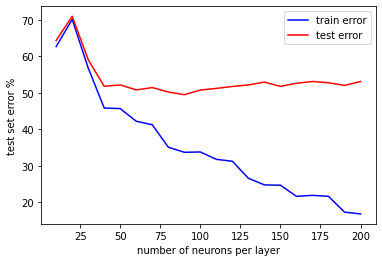

In [9]:
plt.xlabel("number of neurons per layer")
plt.ylabel('test set error %')
plt.plot(x, y_train_error, 'b', label='train error')
plt.plot(x, y_test_error, 'r', label='test error')
plt.legend()

In [10]:
f = open('number_of_neurons_per_layer___test_set_error.txt', 'w')

f.write('number of neurons per layer, train error, test error\n')
for i in range(len(x)):
    f.write('{}, {}, {}'.format(x[i], y_train_error[i], y_test_error[i]))
    f.write('\n')

f.close()